In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
from matplotlib import pyplot as plt

## Loading the Dataset

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


## Checking for null values and Clean the Data

In [5]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [6]:
gender_encoder = LabelEncoder()
df['Gender_enc'] = gender_encoder.fit_transform(df['Gender'])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_enc
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


## Visualize the data

<ipython-input-7-a47e4f7cda40>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_purchase = len(df[df['Purchased'] == 1][df['Gender'] == 'Male'])
<ipython-input-7-a47e4f7cda40>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_purchase = len(df[df['Purchased'] == 1][df['Gender'] == 'Female'])


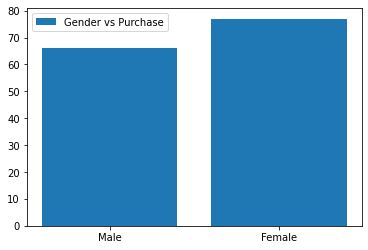

In [7]:
genders = df['Gender'].unique().tolist()
male_purchase = len(df[df['Purchased'] == 1][df['Gender'] == 'Male'])
female_purchase = len(df[df['Purchased'] == 1][df['Gender'] == 'Female'])
plt.bar(genders, [male_purchase, female_purchase], label = 'Gender vs Purchase')
plt.legend()
plt.show()

## Scaling the Data for Regression

In [8]:
X = df.drop(['User ID', 'Gender', 'Purchased'], axis=1)
y = df['Purchased']

In [9]:
X.head()

,Age,EstimatedSalary,Gender_enc
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [11]:
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)

In [12]:
scaled_data.head()

,Age,EstimatedSalary,Gender_enc
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


## Logistic Regression

In [13]:
X_train, X_test,y_train,y_test = train_test_split(scaled_data,y, test_size=0.3)

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [15]:
prediction = logreg.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        78
           1       0.84      0.62      0.71        42

    accuracy                           0.82       120
   macro avg       0.83      0.78      0.79       120
weighted avg       0.83      0.82      0.82       120

